In [ ]:
import requests as r
import bs4

In [ ]:
page = r.get(
    url="https://www.google.com/search?q=carbon+net+zero&tbm=nws",
)
html = page.content

In [ ]:
soup = bs4.BeautifulSoup(html, 'html.parser')
tags  = soup.find_all('a')

link_list = []
for link in tags:
    link_list.append(link.get('href')) 

cleaned_urls = []

for i in link_list:
    if i.startswith('/url?q=https://www'):
        link = i.replace('/url?q=', '')
        cleaned_urls.append(link)



b'<!doctype html><html lang="en-IN"><head><meta charset="UTF-8"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>carbon net zero - Google Search</title><script nonce="zpnHSG2UwzjI+Nly2FA7WQ==">(function(){\ndocument.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"===c||"q"===c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if("A"===a.tagName){a="1"===a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){\nvar a=window.performance;window.start=Date.now();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}window.google=wind
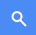
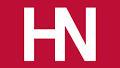
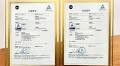
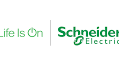
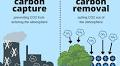
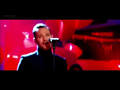
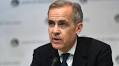
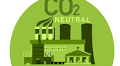

In [34]:
url_main = "https://www.google.com/search"
query = "carbon+net+zero"
tbm= "nws"
start = "15"


URL = f"{url_main}?q={query}&tbm={tbm}&start={start}"

content = r.get(url=URL)
print(content.content)